In [4]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'adc0626e-346d-40b2-8f26-ec7b5f6181aa',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

# Note, It couldnt handle all that data so I hate to open up the terminal and past this code in "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"

{'status': {'timestamp': '2023-05-17T21:41:07.452Z', 'error_code': 0, 'error_message': None, 'elapsed': 28, 'credit_count': 1, 'notice': None, 'total_count': 9697}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10209, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [5]:
import pandas as pd

In [11]:
#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])

df['timestamp']=pd.to_datetime('now')
df

/var/folders/43/9wz9mzx15xx9_nnfd1b0bsx80000gn/T/ipykernel_32776/4133300269.py:5: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp']=pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10209,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.937631e+07,1.937631e+07,False,NaN,1,NaN,NaN,None,2023-05-17T21:39:00.000Z,27401.992786,1.491029e+10,15.3091,0.206413,1.386005,-0.410888,-7.024127,0.195034,11.712218,5.309494e+11,46.5569,5.754418e+11,None,2023-05-17T21:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-17 21:41:23.813570
1,1027,Ethereum,ETH,ethereum,6903,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202830e+08,1.202830e+08,True,NaN,2,NaN,NaN,None,2023-05-17T21:39:00.000Z,1826.799094,6.256076e+09,10.4387,0.007187,-0.061723,-0.688753,-12.068872,2.005396,8.592254,2.197328e+11,19.2675,2.197328e+11,None,2023-05-17T21:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-17 21:41:23.813570
2,825,Tether,USDT,tether,53495,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.284543e+10,8.609064e+10,True,NaN,3,NaN,NaN,None,2023-05-17T21:39:00.000Z,0.999956,2.407273e+10,20.2272,-0.013546,-0.019038,-0.079944,-0.029010,-0.276309,-0.019908,8.284178e+10,7.2641,8.608685e+10,None,2023-05-17T21:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-17 21:41:23.813570
3,1839,BNB,BNB,bnb,1367,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558592e+08,1.558592e+08,False,NaN,4,NaN,NaN,None,2023-05-17T21:39:00.000Z,314.211436,4.341114e+08,7.0346,0.172777,0.943299,-0.039770,-7.784405,-7.006413,0.453309,4.897273e+10,4.2942,4.897273e+10,None,2023-05-17T21:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-17 21:41:23.813570
4,3408,USD Coin,USDC,usd-coin,12436,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.947899e+10,2.947899e+10,False,NaN,5,NaN,NaN,None,2023-05-17T21:39:00.000Z,0.999906,3.119293e+09,12.4108,-0.008687,-0.006223,-0.017056,0.015281,0.045455,-0.009217,2.947620e+10,2.5847,2.947620e+10,None,2023-05-17T21:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-17 21:41:23.813570
5,52,XRP,XRP,xrp,946,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.183782e+10,9.998897e+10,False,NaN,6,NaN,NaN,None,2023-05-17T21:39:00.000Z,0.447275,1.687994e+09,116.7314,-0.061079,4.633478,4.017387,-12.439940,17.832954,13.691995,2.318574e+10,2.0331,4.472746e+10,None,2023-05-17T21:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-17 21:41:23.813570
6,2010,Cardano,ADA,cardano,787,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.485253e+10,3.579395e+10,False,NaN,7,NaN,NaN,None,2023-05-17T21:39:00.000Z,0.376138,2.232002e+08,30.7217,-0.141240,2.787672,2.221198,-13.228074,8.980930,-5.640744,1.310937e+10,1.1495,1.692623e+10,None,2023-05-17T21:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-17 21:41:23.813570
7,74,Dogecoin,DOGE,dogecoin,707,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.393869e+11,1.393869e+11,True,NaN,8,NaN,NaN,None,2023-05-17T21:39:00.000Z,0.075167,3.295444e+08,77.2422,0.053374,3.600268,2.802423,-17.909875,0.073767,-13.955859,1.047735e+10,0.9187,1.047735e+10,None,2023-05-17T21:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-17 21:41:23.813570
8,5426,Solana,SOL,solana,459,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.958033e

In [14]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'adc0626e-346d-40b2-8f26-ec7b5f6181aa',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    
    
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

In [15]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed')
    sleep(60) #sleep for 1 minute
exit() 


{'status': {'timestamp': '2023-05-17T22:05:21.327Z', 'error_code': 0, 'error_message': None, 'elapsed': 21, 'credit_count': 1, 'notice': None, 'total_count': 9697}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10209, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

/var/folders/43/9wz9mzx15xx9_nnfd1b0bsx80000gn/T/ipykernel_32776/3052351355.py:28: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
/var/folders/43/9wz9mzx15xx9_nnfd1b0bsx80000gn/T/ipykernel_32776/3052351355.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


{'status': {'timestamp': '2023-05-17T22:06:21.571Z', 'error_code': 0, 'error_message': None, 'elapsed': 35, 'credit_count': 1, 'notice': None, 'total_count': 9697}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10209, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

/var/folders/43/9wz9mzx15xx9_nnfd1b0bsx80000gn/T/ipykernel_32776/3052351355.py:28: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
/var/folders/43/9wz9mzx15xx9_nnfd1b0bsx80000gn/T/ipykernel_32776/3052351355.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


KeyboardInterrupt: 

In [12]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10209,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.937631e+07,1.937631e+07,False,NaN,1,NaN,NaN,None,2023-05-17T21:39:00.000Z,27401.992786,1.491029e+10,15.3091,0.206413,1.386005,-0.410888,-7.024127,0.195034,11.712218,5.309494e+11,46.5569,5.754418e+11,None,2023-05-17T21:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-17 21:41:23.813570
1,1027,Ethereum,ETH,ethereum,6903,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202830e+08,1.202830e+08,True,NaN,2,NaN,NaN,None,2023-05-17T21:39:00.000Z,1826.799094,6.256076e+09,10.4387,0.007187,-0.061723,-0.688753,-12.068872,2.005396,8.592254,2.197328e+11,19.2675,2.197328e+11,None,2023-05-17T21:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-17 21:41:23.813570
2,825,Tether,USDT,tether,53495,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.284543e+10,8.609064e+10,True,NaN,3,NaN,NaN,None,2023-05-17T21:39:00.000Z,0.999956,2.407273e+10,20.2272,-0.013546,-0.019038,-0.079944,-0.029010,-0.276309,-0.019908,8.284178e+10,7.2641,8.608685e+10,None,2023-05-17T21:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-17 21:41:23.813570
3,1839,BNB,BNB,bnb,1367,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558592e+08,1.558592e+08,False,NaN,4,NaN,NaN,None,2023-05-17T21:39:00.000Z,314.211436,4.341114e+08,7.0346,0.172777,0.943299,-0.039770,-7.784405,-7.006413,0.453309,4.897273e+10,4.2942,4.897273e+10,None,2023-05-17T21:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-17 21:41:23.813570
4,3408,USD Coin,USDC,usd-coin,12436,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.947899e+10,2.947899e+10,False,NaN,5,NaN,NaN,None,2023-05-17T21:39:00.000Z,0.999906,3.119293e+09,12.4108,-0.008687,-0.006223,-0.017056,0.015281,0.045455,-0.009217,2.947620e+10,2.5847,2.947620e+10,None,2023-05-17T21:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-17 21:41:23.813570
5,52,XRP,XRP,xrp,946,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.183782e+10,9.998897e+10,False,NaN,6,NaN,NaN,None,2023-05-17T21:39:00.000Z,0.447275,1.687994e+09,116.7314,-0.061079,4.633478,4.017387,-12.439940,17.832954,13.691995,2.318574e+10,2.0331,4.472746e+10,None,2023-05-17T21:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-17 21:41:23.813570
6,2010,Cardano,ADA,cardano,787,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.485253e+10,3.579395e+10,False,NaN,7,NaN,NaN,None,2023-05-17T21:39:00.000Z,0.376138,2.232002e+08,30.7217,-0.141240,2.787672,2.221198,-13.228074,8.980930,-5.640744,1.310937e+10,1.1495,1.692623e+10,None,2023-05-17T21:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-17 21:41:23.813570
7,74,Dogecoin,DOGE,dogecoin,707,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.393869e+11,1.393869e+11,True,NaN,8,NaN,NaN,None,2023-05-17T21:39:00.000Z,0.075167,3.295444e+08,77.2422,0.053374,3.600268,2.802423,-17.909875,0.073767,-13.955859,1.047735e+10,0.9187,1.047735e+10,None,2023-05-17T21:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-17 21:41:23.813570
8,5426,Solana,SOL,solana,459,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.958033e

In [16]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [17]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10209,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19376306.00000,19376306.00000,False,NaN,1,NaN,NaN,None,2023-05-17T21:39:00.000Z,27401.99279,14910293772.35201,15.30910,0.20641,1.38601,-0.41089,-7.02413,0.19503,11.71222,530949397235.04285,46.55690,575441848510.03003,None,2023-05-17T21:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-17 21:41:23.813570,NaT
1,1027,Ethereum,ETH,ethereum,6903,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120282980.95694,120282980.95694,True,NaN,2,NaN,NaN,None,2023-05-17T21:39:00.000Z,1826.79909,6256076226.72842,10.43870,0.00719,-0.06172,-0.68875,-12.06887,2.00540,8.59225,219732840635.40161,19.26750,219732840635.39999,None,2023-05-17T21:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-17 21:41:23.813570,NaT
2,825,Tether,USDT,tether,53495,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,82845432957.31229,86090638895.06883,True,NaN,3,NaN,NaN,None,2023-05-17T21:39:00.000Z,0.99996,24072728629.03798,20.22720,-0.01355,-0.01904,-0.07994,-0.02901,-0.27631,-0.01991,82841784642.24818,7.26410,86086847668.88000,None,2023-05-17T21:39:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-17 21:41:23.813570,NaT
3,1839,BNB,BNB,bnb,1367,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155859164.52722,155859164.52722,False,NaN,4,NaN,NaN,None,2023-05-17T21:39:00.000Z,314.21144,434111357.35914,7.03460,0.17278,0.94330,-0.03977,-7.78441,-7.00641,0.45331,48972731863.53680,4.29420,48972731863.54000,None,2023-05-17T21:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-17 21:41:23.813570,NaT
4,3408,USD Coin,USDC,usd-coin,12436,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,29478988864.46225,29478988864.46225,False,NaN,5,NaN,NaN,None,2023-05-17T21:39:00.000Z,0.99991,3119293374.87788,12.41080,-0.00869,-0.00622,-0.01706,0.01528,0.04545,-0.00922,29476204076.61419,2.58470,29476204076.61000,None,2023-05-17T21:39:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-17 21:41:23.813570,NaT
5,52,XRP,XRP,xrp,946,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51837820505.00000,99988965239.00000,False,NaN,6,NaN,NaN,None,2023-05-17T21:39:00.000Z,0.44727,1687993851.93427,116.73140,-0.06108,4.63348,4.01739,-12.43994,17.83295,13.69199,23185740691.52198,2.03310,44727460502.10000,None,2023-05-17T21:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-17 21:41:23.813570,NaT
6,2010,Cardano,ADA,cardano,787,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34852526365.54500,35793946862.56700,False,NaN,7,NaN,NaN,None,2023-05-17T21:39:00.000Z,0.37614,223200221.85539,30.72170,-0.14124,2.78767,2.22120,-13.22807,8.98093,-5.64074,13109374641.47418,1.14950,16926229469.82000,None,2023-05-17T21:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-17 21:41:23.813570,NaT
7,74,Dogecoin,DOGE,dogecoin,707,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139386946383.70520,139386946383.70520,True,NaN,8,NaN,NaN,None,2023-05-17T21:39:00.000Z,0.07517,329544399.18297,77.24220,0.05337,3.60027,2.80242,-17.90987,0.07377,-13.95586,10477346628.54183,0.91870,10477346628.

In [19]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

In [20]:
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.13882,1.30629,-0.51969,-7.10281,0.19024,11.66084
Ethereum,-0.07728,-0.12053,-0.74553,-12.13504,2.11126,8.51129
Tether,0.00524,-0.00064,-0.06552,-0.02195,-0.26852,-0.00337
BNB,0.00320,0.76101,-0.12452,-7.83035,-6.97280,0.36420
USD Coin,0.00426,0.00794,-0.00950,0.02396,0.04675,0.00505
XRP,-0.13717,3.35008,3.99017,-12.59744,17.92694,13.72936
Cardano,-0.25394,2.49793,2.13483,-13.40656,9.00692,-5.61646
Dogecoin,0.00064,3.08004,2.82525,-18.06289,0.24018,-13.98192
Solana,0.03944,1.83603,0.61129,-14.56127,-3.86769,-8.34233


In [21]:
df4 = df3.stack()
df4

name                                         
Bitcoin          quote.USD.percent_change_1h      0.13882
                 quote.USD.percent_change_24h     1.30629
                 quote.USD.percent_change_7d     -0.51969
                 quote.USD.percent_change_30d    -7.10281
                 quote.USD.percent_change_60d     0.19024
                 quote.USD.percent_change_90d    11.66084
Ethereum         quote.USD.percent_change_1h     -0.07728
                 quote.USD.percent_change_24h    -0.12053
                 quote.USD.percent_change_7d     -0.74553
                 quote.USD.percent_change_30d   -12.13504
                 quote.USD.percent_change_60d     2.11126
                 quote.USD.percent_change_90d     8.51129
Tether           quote.USD.percent_change_1h      0.00524
                 quote.USD.percent_change_24h    -0.00064
                 quote.USD.percent_change_7d     -0.06552
                 quote.USD.percent_change_30d    -0.02195
                 quote.USD

In [22]:
type(df3)

pandas.core.frame.DataFrame

In [23]:
type(df4)

pandas.core.series.Series

In [24]:
#must change back to dataframe

df5 = df4.to_frame(name='Values')

In [25]:
df5

Values
name                                                  
Bitcoin         quote.USD.percent_change_1h    0.13882
                quote.USD.percent_change_24h   1.30629
                quote.USD.percent_change_7d   -0.51969
                quote.USD.percent_change_30d  -7.10281
                quote.USD.percent_change_60d   0.19024
                quote.USD.percent_change_90d  11.66084
Ethereum        quote.USD.percent_change_1h   -0.07728
                quote.USD.percent_change_24h  -0.12053
                quote.USD.percent_change_7d   -0.74553
                quote.USD.percent_change_30d -12.13504
                quote.USD.percent_change_60d   2.11126
                quote.USD.percent_change_90d   8.51129
Tether          quote.USD.percent_change_1h    0.00524
                quote.USD.percent_change_24h  -0.00064
                quote.USD.percent_change_7d   -0.06552
                quote.USD.percent_change_30d  -0.02195
                quote.USD.percent_change_60d  -0.26852
                quote.USD.percent_change_90d  -0.00337
BNB             quote.USD.percent_change_1h    0.00320
                quote.USD.percent_change_24h   0.76101
                quote.USD.percent_change_7d   -0.12452
                quote.USD.percent_change_30d  -7.83035
                quote.USD.percent_change_60d  -6.97280
                quote.USD.percent_change_90d   0.36420
USD Coin        quote.USD.percent_change_1h    0.00426
                quote.USD.percent_change_24h   0.00794
                quote.USD.percent_change_7d   -0.00950
                quote.USD.percent_change_30d   0.02396
                quote.USD.percent_change_60d   0.04675
                quote.USD.percent_change_90d   0.00505
XRP             quote.USD.percent_change_1h   -0.13717
                quote.USD.percent_change_24h   3.35008
                quote.USD.percent_change_7d    3.99017
                quote.USD.percent_change_30d -12.59744
                quote.USD.percent_change_60d  17.92694
                quote.USD.percent_change_90d  13.72936
Cardano         quote.USD.percent_change_1h   -0.25394
                quote.USD.percent_change_24h   2.49793
                quote.USD.percent_change_7d    2.13483
                quote.USD.percent_change_30d -13.40656
                quote.USD.percent_change_60d   9.00692
                quote.USD.percent_change_90d  -5.61646
Dogecoin        quote.USD.percent_change_1h    0.00064
                quote.USD.percent_change_24h   3.08004
                quote.USD.percent_change_7d    2.82525
                quote.USD.percent_change_30d -18.06289
                quote.USD.percent_change_60d   0.24018
                quote.USD.percent_change_90d -13.98192
Solana          quote.USD.percent_change_1h    0.03944
                quote.USD.percent_change_24h   1.83603
                quote.USD.percent_change_7d    0.61129
                quote.USD.percent_change_30d -14.56127
                quote.USD.percent_change_60d  -3.86769
                quote.USD.percent_change_90d  -8.34233
Polygon         quote.USD.percent_change_1h   -0.27307
                quote.USD.percent_change_24h   5.65831
                quote.USD.percent_change_7d    2.15493
                quote.USD.percent_change_30d -22.69535
                quote.USD.percent_change_60d -25.45542
                quote.USD.percent_change_90d -36.92781
Litecoin        quote.USD.percent_change_1h   -0.31673
                quote.USD.percent_change_24h   5.15260
                quote.USD.percent_change_7d   16.09279
                quote.USD.percent_change_30d  -4.31489
                quote.USD.percent_change_60d  11.28788
                quote.USD.percent_change_90d  -7.45853
TRON            quote.USD.percent_change_1h   -0.09991
                quote.USD.percent_change_24h   0.76234
                quote.USD.percent_change_7d    2.60800
                quote.USD.percent_change_30d   7.90579
                quote.USD.percent_change_60d   6.90760
                quote.USD.percent

In [29]:
df5.count()

Values    120
dtype: int64

In [32]:
index = pd.Index(range(120))

df6 = df5.reset_index()
df6

,name,level_1,Values
0,Bitcoin,quote.USD.percent_change_1h,0.13882
1,Bitcoin,quote.USD.percent_change_24h,1.30629
2,Bitcoin,quote.USD.percent_change_7d,-0.51969
3,Bitcoin,quote.USD.percent_change_30d,-7.10281
4,Bitcoin,quote.USD.percent_change_60d,0.19024
5,Bitcoin,quote.USD.percent_change_90d,11.66084
6,Ethereum,quote.USD.percent_change_1h,-0.07728
7,Ethereum,quote.USD.percent_change_24h,-0.12053
8,Ethereum,quote.USD.percent_change_7d,-0.74553
9,Ethereum,quote.USD.percent_change_30d,-12.13504


In [33]:
df7 = df6.rename(columns={'level_1': 'percent_change'})

In [35]:
df7

,name,percent_change,Values
0,Bitcoin,quote.USD.percent_change_1h,0.13882
1,Bitcoin,quote.USD.percent_change_24h,1.30629
2,Bitcoin,quote.USD.percent_change_7d,-0.51969
3,Bitcoin,quote.USD.percent_change_30d,-7.10281
4,Bitcoin,quote.USD.percent_change_60d,0.19024
5,Bitcoin,quote.USD.percent_change_90d,11.66084
6,Ethereum,quote.USD.percent_change_1h,-0.07728
7,Ethereum,quote.USD.percent_change_24h,-0.12053
8,Ethereum,quote.USD.percent_change_7d,-0.74553
9,Ethereum,quote.USD.percent_change_30d,-12.13504


In [40]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,Values
0,Bitcoin,1h,0.13882
1,Bitcoin,24h,1.30629
2,Bitcoin,7d,-0.51969
3,Bitcoin,30d,-7.10281
4,Bitcoin,60d,0.19024
5,Bitcoin,90d,11.66084
6,Ethereum,1h,-0.07728
7,Ethereum,24h,-0.12053
8,Ethereum,7d,-0.74553
9,Ethereum,30d,-12.13504


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

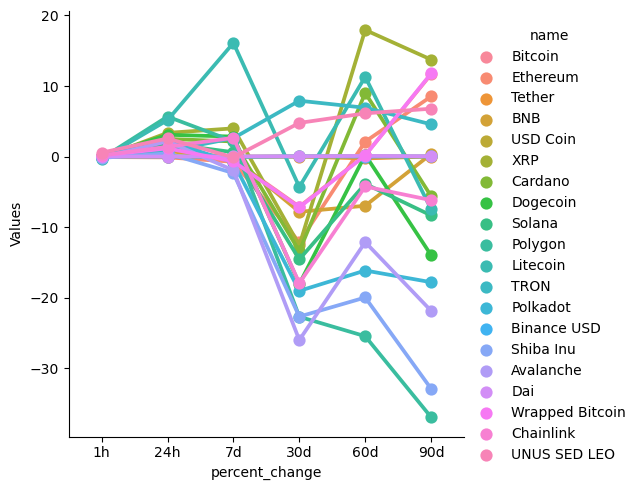

In [41]:
sns.catplot(x='percent_change',y='Values',hue='name',data=df7,kind='point')